In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
data=pd.read_csv('campusrecruiment.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [51]:
data['gender'].value_counts()


M    139
F     76
Name: gender, dtype: int64

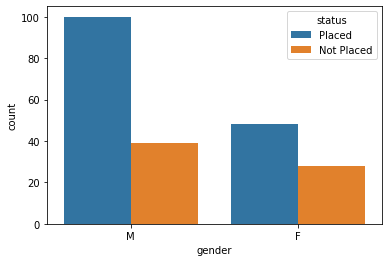

In [52]:
sns.countplot("gender", hue="status", data=data)
plt.show()

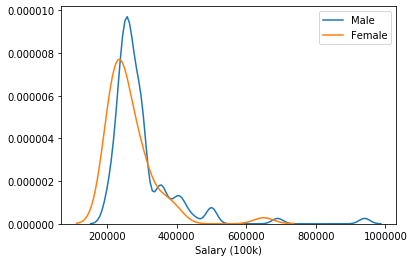

In [53]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(data.salary[ data.gender=="M"])
sns.kdeplot(data.salary[ data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

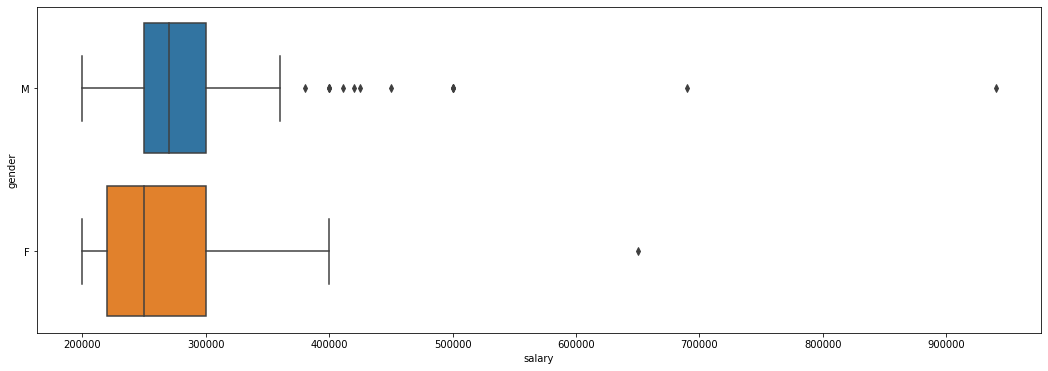

In [54]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()                                    ##male getting high paid job

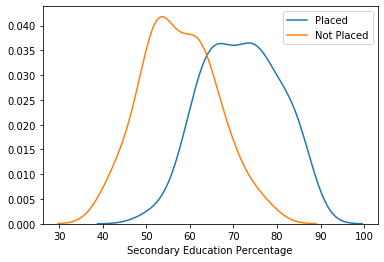

In [55]:
#Kernel-Density Plot
sns.kdeplot(data.ssc_p[ data.status=="Placed"])
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

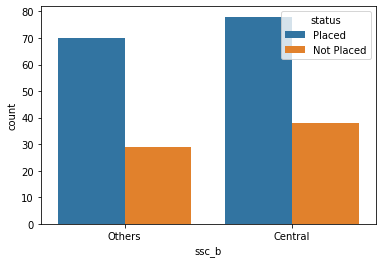

In [56]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()                                          ##board of education does not affect the placement

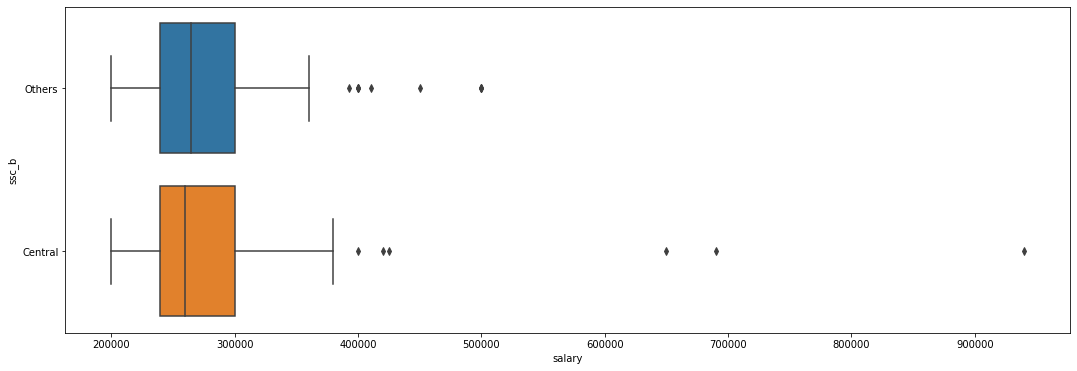

In [57]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()                               ##board of central get high paid job


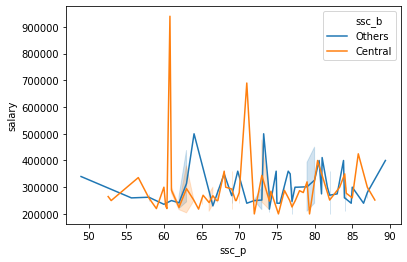

In [58]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()         ##No specific pattern (correlation) between Secondary Education Percentage and Salary.
                   ##Board of Education is Not Affecting Salary

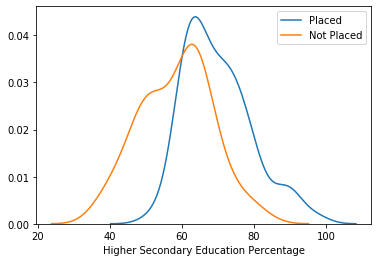

In [59]:
#Kernel-Density Plot
sns.kdeplot(data.hsc_p[ data.status=="Placed"])
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")   #Overlap here too. More placements for percentage above 65%
                            #Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed
plt.show()

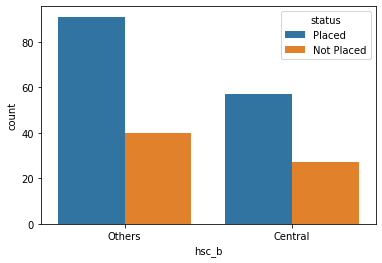

In [60]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()             #education Board again, doesn't affect placement status much

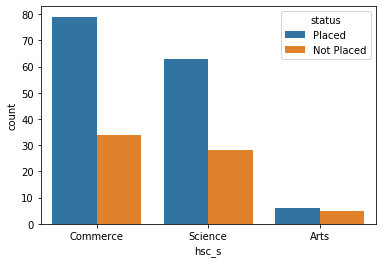

In [61]:
sns.countplot("hsc_s", hue="status", data=data)
plt.show()  #We have very less students with Arts specialization.
           #Around 2:1 placed:unplaced ratio for both Science and Commerse students


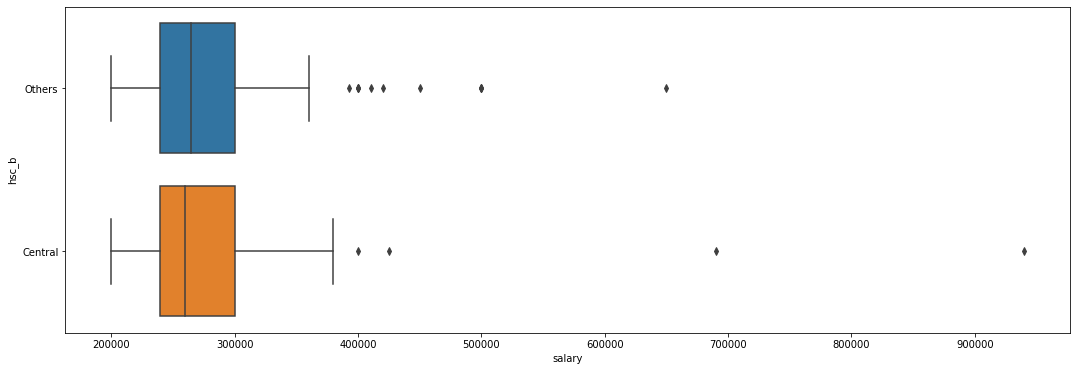

In [62]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=data)
plt.show()

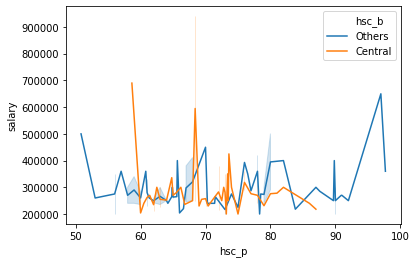

In [63]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=data)
plt.show()      #High salary from both Central and Other.
               #High salary for both high and low percentage.
                #Thus, both these feature doesnot affect salary.

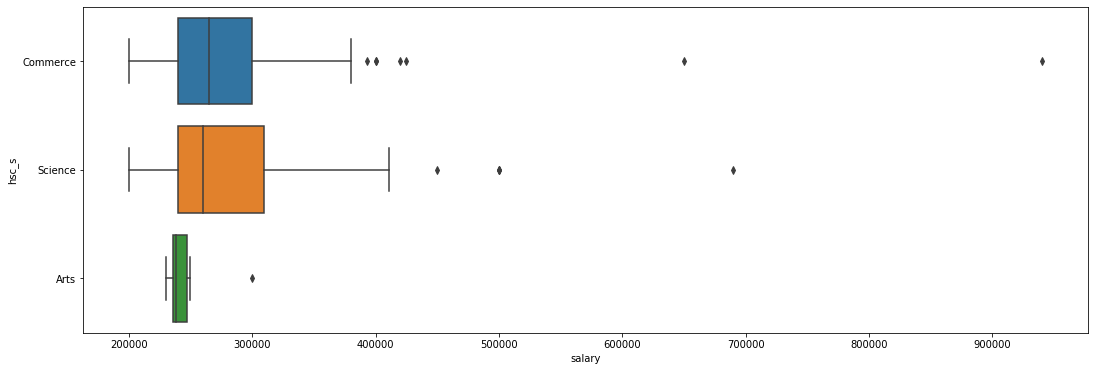

In [64]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=data)
plt.show()           #We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.

                          #Commerse students have slightly better placement status.

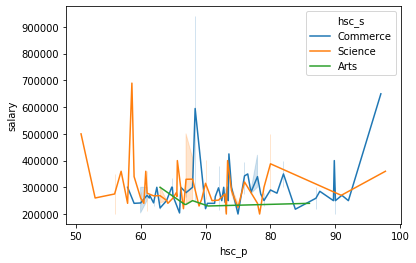

In [65]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=data)
plt.show()   #Student with Art Specialization surprisingly have comparatively low salary


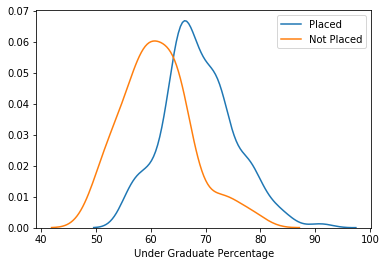

In [66]:
#Kernel-Density Plot
sns.kdeplot(data.degree_p[ data.status=="Placed"])
sns.kdeplot(data.degree_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage") 
plt.show()         #Overlap here too. But More placements for percentage above 65.
                   #UG Percentage least 50% to get placement


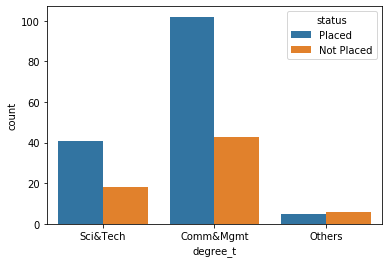

In [67]:
sns.countplot("degree_t", hue="status", data=data)
plt.show()

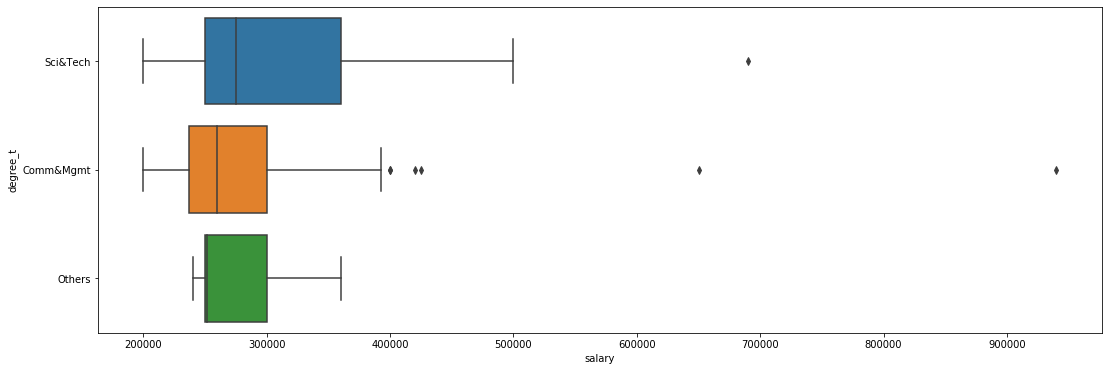

In [68]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()     #Science&Tech students getting more salary on average
               #Management stidents are getting more highly paid dream jobs.

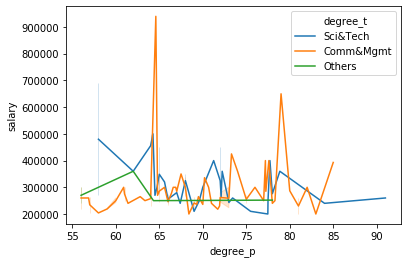

In [69]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=data)
plt.show()  #Percentage does not seem to affect salary.
            #Commerce&Mgmt students occasionally get dream placements with high salary

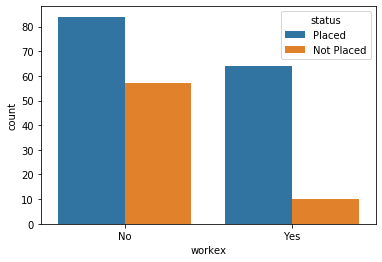

In [70]:
sns.countplot("workex", hue="status", data=data)
plt.show()

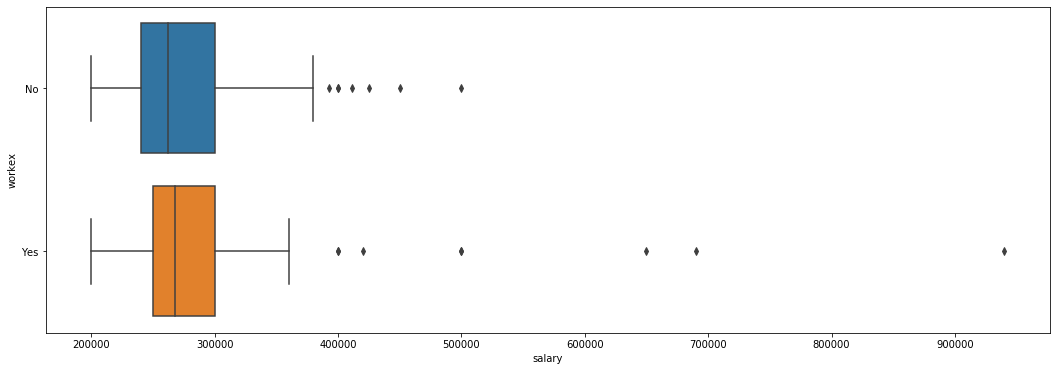

In [71]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=data)
plt.show()   #Outliers (High salary than average) on bith end but students with experience getting dream jobs
            #Average salary as well as base salary high for students with work experience.

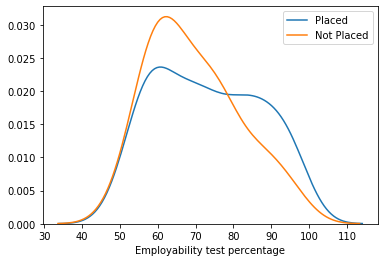

In [72]:
#Kernel-Density Plot
sns.kdeplot(data.etest_p[ data.status=="Placed"])
sns.kdeplot(data.etest_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()   #High overlap -> It does not affect placement status much
             #More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

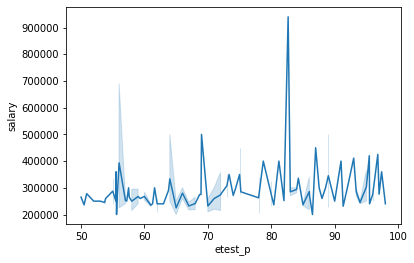

In [73]:
sns.lineplot("etest_p", "salary", data=data)
plt.show()

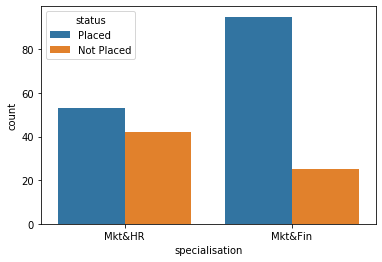

In [74]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()   #This feature affects Placement status.
            #Comparitively very low not-placed students in Mkt&Fin Section

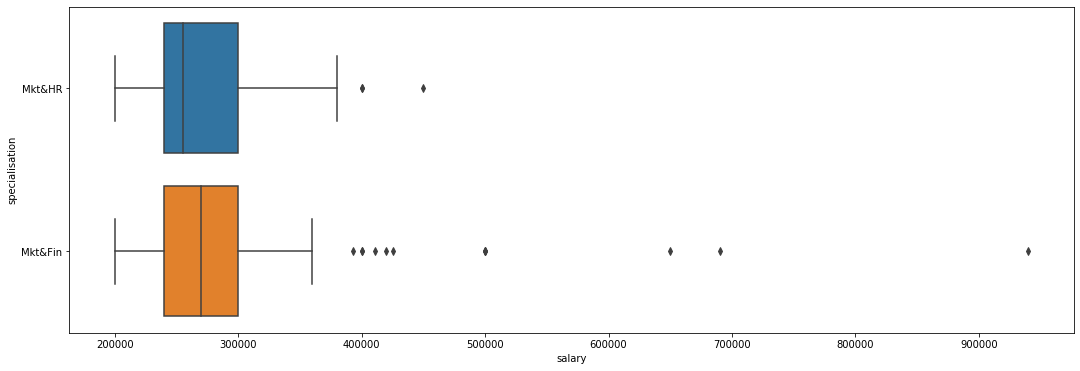

In [75]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=data)
plt.show()

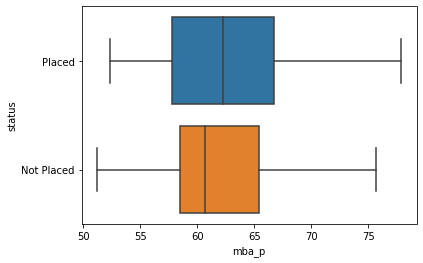

In [76]:
sns.boxplot("mba_p", "status", data=data)
plt.show()

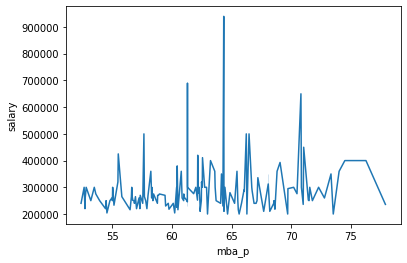

In [77]:
sns.lineplot("mba_p", "salary", data=data)
plt.show()
#MBA Percentage also deos not affect salary much

In [80]:
t=data['ssc_b']


In [81]:
data.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

In [82]:
data.dtypes
# We have to encode gender,hsc_s, degree_t, workex, specialisation and status

sl_no               int64
gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [83]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [ ]:
#Predicting If Students gets placed or not (Binary Classification Problem)
#Predicting Salary of Student (Regression Problem)

In [84]:
#Lets make a copy of data, before we proceeed with specific problems
data_clf = data.copy()
data_reg = data.copy()

In [85]:
#binary classification
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [86]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']

In [87]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [88]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred)

0.8

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        17
           1       0.86      0.88      0.87        48

    accuracy                           0.80        65
   macro avg       0.74      0.73      0.74        65
weighted avg       0.80      0.80      0.80        65



In [91]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred)

0.8307692307692308

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.88      0.90      0.89        48

    accuracy                           0.83        65
   macro avg       0.78      0.77      0.78        65
weighted avg       0.83      0.83      0.83        65



In [94]:
##salary REGRESSION ANALYSIS
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

In [95]:
#dropping NaNs (in Salary)
data_reg.dropna(inplace=True)
#dropping Status = "Placed" column
data_reg.drop("status", axis=1, inplace=True)


In [96]:
data_reg.head()

,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,0,67.00,91.00,0,58.00,1,0,55.0,0,58.80,270000.0
1,2,0,79.33,78.33,1,77.48,1,1,86.5,1,66.28,200000.0
2,3,0,65.00,68.00,2,64.00,0,0,75.0,1,57.80,250000.0
4,5,0,85.80,73.60,0,73.30,0,0,96.8,1,55.50,425000.0
7,8,0,82.00,64.00,1,66.00,1,1,67.0,1,62.14,252000.0


In [97]:
#Seperating Depencent and Independent Vaiiables
y = data_reg["salary"] #Dependent Variable
X = data_reg.drop("salary", axis=1)
column_names = X.columns.values

In [98]:
#Scalizing between 0-1 (Normalization)
X_scaled = MinMaxScaler().fit_transform(X)

In [ ]:
#The least significant variable is a variable which:

#has the highest p-value
#Removing it reduces R2 to lowest value compared to other features
#Removing it has least increment in residuals-sum-of-squares (RSS)

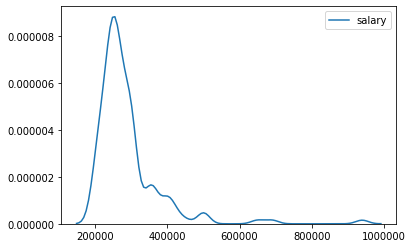

In [99]:
#PDF of Salary
sns.kdeplot(y)
plt.show() #It is clear that very few students have salary greater than 400,000 (hence outliers)

In [100]:
#Selecting outliers
y[y > 400000]
# 9 records

4      425000.0
39     411000.0
53     450000.0
77     500000.0
95     420000.0
119    940000.0
150    690000.0
163    500000.0
174    500000.0
177    650000.0
Name: salary, dtype: float64

In [101]:
#Removing these Records from data
X_scaled = X_scaled[y < 400000]
y = y[y < 400000]

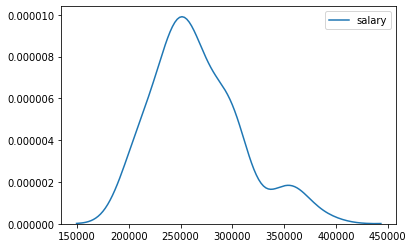

In [102]:
#PDF of Salary without outliers. Still skewed though
sns.kdeplot(y)
plt.show()


In [104]:
from sklearn.linear_model import LinearRegression

In [118]:
import statsmodels.api as sm  ##OLS REGRESSION

In [119]:

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
#PREDICTING THE SALARY FOR THE TEST VALUES

y_pred=lr.predict(X_test)

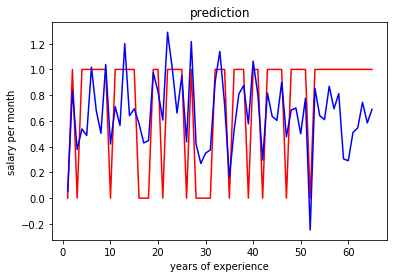

In [121]:
#PLOTTING THE ACTUAL AND TEST VALUES

P=[i for i in range(1,len(y_test)+1,1)]

plt.plot(P,y_test,c='r',linestyle='-')
plt.plot(P,y_pred,c='b',linestyle='-')

plt.xlabel("years of experience")
plt.ylabel('salary per month')
plt.title('prediction')

plt.show()


In [122]:
#Converting to DF for as  column names gives readibility
X_scaled = pd.DataFrame(X_scaled, columns=column_names)
y = y.values

# We must add a constants 1s for intercept before doing Linear Regression with statsmodel
X_scaled = sm.add_constant(X_scaled)
X_scaled.head()

,const,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,0.000000,0.0,0.445545,0.857051,0.0,0.057143,0.5,0.0,0.104167,0.0,0.251666
1,1.0,0.004695,0.0,0.750743,0.586729,0.5,0.613714,0.5,1.0,0.760417,1.0,0.544884
2,1.0,0.009390,0.0,0.396040,0.366332,1.0,0.228571,0.0,0.0,0.520833,1.0,0.212466
3,1.0,0.032864,0.0,0.816832,0.280990,0.5,0.285714,0.5,1.0,0.354167,1.0,0.382595
4,1.0,0.037559,0.0,0.594059,0.601024,0.0,0.457143,0.0,0.0,0.861250,1.0,0.349275


In [123]:
# Step 1: With all Features
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.635
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0969
Time:                        21:51:30   Log-Likelihood:                -1608.0
No. Observations:                 134   AIC:                             3240.
Df Residuals:                     122   BIC:                             3275.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.709e+05   1.59e+04     17.069      0.000    2.39e+05    3.02e+05
sl_no          -1.206e+04   1.35e+04     -0.891      0.374   -3.89e+04    1.47e+04
gender         -1.812e+04   8312.977     -2.180      0.031   -3.46e+04   -1662.099
ssc_p           -510.6732   2.04e+04     -0.025      0.980   -4.09e+04    3.99e+04
hsc_p          -2.351e+04   2.21e+04     -1.065      0.289   -6.72e+04    2.02e+04
hsc_s          -3.013e+04    1.6e+04     -1.883      0.062   -6.18e+04    1541.035
degree_p       -1.093e+04   2.26e+04     -0.484      0.630   -5.57e+04    3.38e+04
degree_t        4.227e+04   1.72e+04      2.461      0.015    8271.786    7.63e+04
workex         -7378.4001   7690.687     -0.959      0.339   -2.26e+04    7846.084
etest_p         2.046e+04   1.45e+04      1.412      0.161   -8232.973    4.91e+04
specialisation  1849.5176   8049.340      0.230      0.819   -1.41e+04    1.78e+04
mba_p           3.634e+04   2.11e+04      1.720      0.088   -5480.461    7.82e+04
==============================================================================
Omnibus:                        8.625   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.423
Skew:                           0.584   Prob(JB):                       0.0148
Kurtosis:                       3.382   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# Feature ssc_p has 0.995
#drop ssc_p
X_scaled = X_scaled.drop('ssc_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.814
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0648
Time:                        21:51:57   Log-Likelihood:                -1608.0
No. Observations:                 134   AIC:                             3238.
Df Residuals:                     123   BIC:                             3270.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.708e+05   1.51e+04     17.889      0.000    2.41e+05    3.01e+05
sl_no          -1.206e+04   1.35e+04     -0.895      0.373   -3.87e+04    1.46e+04
gender         -1.815e+04   8191.003     -2.216      0.029   -3.44e+04   -1935.170
hsc_p          -2.362e+04   2.16e+04     -1.095      0.276   -6.63e+04    1.91e+04
hsc_s          -3.013e+04   1.59e+04     -1.891      0.061   -6.17e+04    1408.240
degree_p       -1.104e+04   2.21e+04     -0.500      0.618   -5.47e+04    3.27e+04
degree_t         4.22e+04   1.69e+04      2.501      0.014    8794.195    7.56e+04
workex         -7389.7753   7646.007     -0.966      0.336   -2.25e+04    7745.026
etest_p         2.039e+04   1.42e+04      1.437      0.153   -7692.594    4.85e+04
specialisation  1851.9941   8015.967      0.231      0.818    -1.4e+04    1.77e+04
mba_p           3.626e+04   2.08e+04      1.745      0.083   -4862.972    7.74e+04
==============================================================================
Omnibus:                        8.639   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.439
Skew:                           0.584   Prob(JB):                       0.0147
Kurtosis:                       3.383   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#drop specialisation
X_scaled = X_scaled.drop('specialisation', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.025
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0418
Time:                        21:52:24   Log-Likelihood:                -1608.0
No. Observations:                 134   AIC:                             3236.
Df Residuals:                     124   BIC:                             3265.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.714e+05   1.48e+04     18.305      0.000    2.42e+05    3.01e+05
sl_no      -1.232e+04   1.34e+04     -0.921      0.359   -3.88e+04    1.42e+04
gender     -1.829e+04   8135.431     -2.249      0.026   -3.44e+04   -2192.246
hsc_p      -2.353e+04   2.15e+04     -1.095      0.276   -6.61e+04     1.9e+04
hsc_s          -3e+04   1.59e+04     -1.891      0.061   -6.14e+04    1396.148
degree_p   -1.095e+04    2.2e+04     -0.498      0.620   -5.45e+04    3.26e+04
degree_t    4.172e+04   1.67e+04      2.501      0.014    8697.786    7.47e+04
workex     -7161.3684   7552.829     -0.948      0.345   -2.21e+04    7787.796
etest_p     2.125e+04   1.36e+04      1.558      0.122   -5750.734    4.82e+04
mba_p       3.673e+04   2.06e+04      1.784      0.077   -4022.723    7.75e+04
==============================================================================
Omnibus:                        8.348   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.118
Skew:                           0.576   Prob(JB):                       0.0173
Kurtosis:                       3.357   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
X_scaled = X_scaled.drop('degree_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.260
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0273
Time:                        21:52:50   Log-Likelihood:                -1608.2
No. Observations:                 134   AIC:                             3234.
Df Residuals:                     125   BIC:                             3260.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.69e+05    1.4e+04     19.252      0.000    2.41e+05    2.97e+05
sl_no      -1.193e+04   1.33e+04     -0.896      0.372   -3.83e+04    1.44e+04
gender     -1.858e+04   8090.728     -2.296      0.023   -3.46e+04   -2567.506
hsc_p      -2.329e+04   2.14e+04     -1.087      0.279   -6.57e+04    1.91e+04
hsc_s      -2.997e+04   1.58e+04     -1.895      0.060   -6.13e+04    1327.960
degree_t    4.201e+04   1.66e+04      2.527      0.013    9108.721    7.49e+04
workex     -6922.8994   7514.904     -0.921      0.359   -2.18e+04    7950.027
etest_p     2.059e+04   1.35e+04      1.521      0.131   -6197.334    4.74e+04
mba_p        3.26e+04   1.88e+04      1.735      0.085   -4580.998    6.98e+04
==============================================================================
Omnibus:                        7.796   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.510
Skew:                           0.556   Prob(JB):                       0.0234
Kurtosis:                       3.327   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
# workex has max P-Value and is greater than 0.05
# Increase in Adjusted R2
# Feature workex has 0.337
#drop workex
X_scaled = X_scaled.drop('workex', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.465
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0210
Time:                        21:53:44   Log-Likelihood:                -1608.6
No. Observations:                 134   AIC:                             3233.
Df Residuals:                     126   BIC:                             3256.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.669e+05   1.38e+04     19.366      0.000     2.4e+05    2.94e+05
sl_no      -1.249e+04   1.33e+04     -0.940      0.349   -3.88e+04    1.38e+04
gender     -1.731e+04   7967.267     -2.172      0.032   -3.31e+04   -1541.189
hsc_p      -2.123e+04   2.13e+04     -0.997      0.321   -6.34e+04    2.09e+04
hsc_s      -2.986e+04   1.58e+04     -1.890      0.061   -6.11e+04    1412.063
degree_t    4.009e+04   1.65e+04      2.432      0.016    7469.284    7.27e+04
etest_p     2.028e+04   1.35e+04      1.500      0.136   -6481.274     4.7e+04
mba_p         2.9e+04   1.84e+04      1.579      0.117   -7341.433    6.54e+04
==============================================================================
Omnibus:                        8.289   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.040
Skew:                           0.570   Prob(JB):                       0.0180
Kurtosis:                       3.374   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# hsc_p has max P-Value and is greater than 0.05
# Increase in Adjusted R2
# Feature hsc_p has 0.444
#drop hsc_p
X_scaled = X_scaled.drop('hsc_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.710
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0165
Time:                        21:54:46   Log-Likelihood:                -1609.1
No. Observations:                 134   AIC:                             3232.
Df Residuals:                     127   BIC:                             3253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.587e+05   1.11e+04     23.398      0.000    2.37e+05    2.81e+05
sl_no      -8833.2817   1.28e+04     -0.692      0.490   -3.41e+04    1.64e+04
gender      -1.68e+04   7950.870     -2.113      0.037   -3.25e+04   -1067.880
hsc_s      -2.533e+04   1.51e+04     -1.674      0.097   -5.53e+04    4619.859
degree_t    3.782e+04   1.63e+04      2.317      0.022    5518.007    7.01e+04
etest_p     1.786e+04   1.33e+04      1.343      0.182   -8462.372    4.42e+04
mba_p       2.403e+04   1.77e+04      1.360      0.176   -1.09e+04     5.9e+04
==============================================================================
Omnibus:                        9.373   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.268
Skew:                           0.601   Prob(JB):                      0.00971
Kurtosis:                       3.463   Cond. No.                         7.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# etest_p has max P-Value and is greater than 0.05
# Slight Decrease in Adjusted R2..
# Feature etest_p has 0.2
#drop etest_p
X_scaled = X_scaled.drop('etest_p', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.874
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0171
Time:                        21:55:09   Log-Likelihood:                -1610.1
No. Observations:                 134   AIC:                             3232.
Df Residuals:                     128   BIC:                             3250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.641e+05   1.03e+04     25.537      0.000    2.44e+05    2.85e+05
sl_no      -7211.2437   1.28e+04     -0.565      0.573   -3.24e+04     1.8e+04
gender     -1.892e+04   7816.452     -2.421      0.017   -3.44e+04   -3458.229
hsc_s      -2.632e+04   1.52e+04     -1.736      0.085   -5.63e+04    3687.663
degree_t    3.903e+04   1.64e+04      2.387      0.018    6679.850    7.14e+04
mba_p       3.175e+04   1.68e+04      1.894      0.060   -1420.967    6.49e+04
==============================================================================
Omnibus:                       10.677   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.833
Skew:                           0.659   Prob(JB):                      0.00444
Kurtosis:                       3.453   Cond. No.                         7.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# hsc_s has max P-Value and is greater than 0.05
# Drastic Decrease in Adjusted R2..
# Feature hsc_s has 0.09
#drop hsc_s
X_scaled = X_scaled.drop('hsc_s', axis=1)
model = sm.OLS(y, X_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.795
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0288
Time:                        21:55:28   Log-Likelihood:                -1611.6
No. Observations:                 134   AIC:                             3233.
Df Residuals:                     129   BIC:                             3248.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         2.6e+05   1.02e+04     25.614      0.000     2.4e+05     2.8e+05
sl_no      -4894.1941   1.28e+04     -0.383      0.702   -3.02e+04    2.04e+04
gender     -2.056e+04   7819.946     -2.629      0.010    -3.6e+04   -5084.684
degree_t    2.279e+04   1.35e+04      1.687      0.094   -3942.142    4.95e+04
mba_p       3.046e+04   1.69e+04      1.805      0.073   -2936.423    6.39e+04
==============================================================================
Omnibus:                       12.997   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.748
Skew:                           0.744   Prob(JB):                      0.00103
Kurtosis:                       3.495   Cond. No.                         6.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##Stopping here. mba_p -> 0.06 only a bit higher than 0.05
#Thus, Top 5 Features affecting salary we identified are:

#gender -> Gender
#degree_t -> Under Graduation(Degree type)- Field of degree education
#mba_p -> MBA percentage
#hsc_s -> Specialization in Higher Secondary Education
#etest_p -> Employability test percentage

In [133]:
from sklearn.metrics import r2_score,mean_squared_error

In [134]:
rsq=r2_score(y_test,y_pred)
rsq

0.36506213137592713

In [135]:
mse=mean_squared_error(y_test,y_pred)
mse

0.1226294203070399